<a href="https://colab.research.google.com/github/Feiquanl/CS5100Project/blob/main/total50Vader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Read in data
df = pd.read_csv("Book_1_50.csv")
print(df.shape)
#df = df.head(500)
columns_to_check=["reviewText","summary"]
df = df.dropna(subset=columns_to_check)
print(df.shape)

(43148, 12)
(43117, 12)


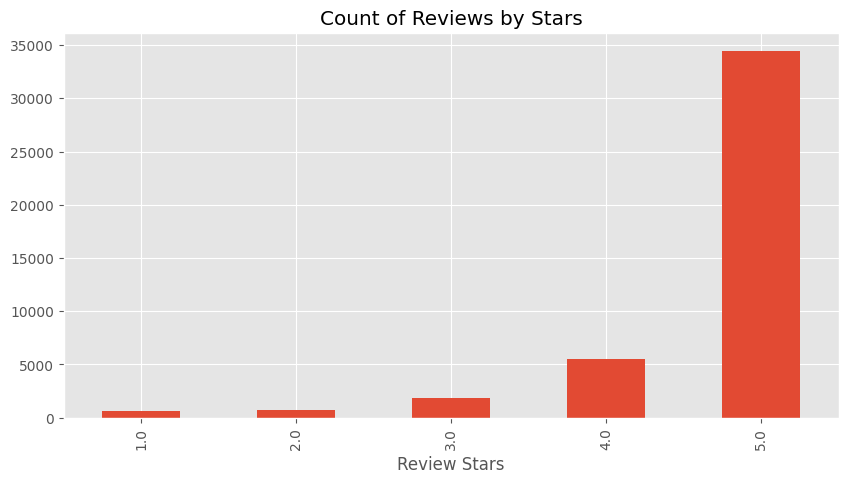

In [ ]:

# Now, count the occurrences of each unique value in the 'overall' column of the filtered DataFrame
# and then sort these counts based on the index, which in this case is the review rating value itself.
ax = df['overall'].value_counts().sort_index() \
    .plot(kind='bar',  # Plot the counts as a bar chart.
          title=f'Count of Reviews by Stars',  # Set the title of the plot, including the ASIN.
          figsize=(10, 5))  # Set the size of the plot to 10 inches wide by 5 inches tall.

# Set the label for the x-axis of the plot to 'Review Stars'.
ax.set_xlabel('Review Stars')

# Display the plot.
plt.show()

In [ ]:
#Extract one book to an new df and reset the index to start from 0
new_df=df.copy()
new_df = new_df.reset_index(drop=True)
# Reset the index and add the old index as a new column called 'ID'
# Add a new column to new_df and  start IDs from 1 instead of 0
new_df['Id'] = range(1, len(new_df) + 1)
print(new_df.head())
#print(new_df.shape)
example =new_df['reviewText'][50]
print(example)

   overall  verified   reviewTime      reviewerID        asin  \
0      4.0      True   04 5, 2018  A3OFV8AGCZBR4Q  0061900621   
1      5.0      True  03 20, 2018   AFRZEPUFQ5MMC  0061900621   
2      5.0      True   03 7, 2018  A1S1CPDH3FQJGW  0061900621   
3      5.0      True   02 6, 2018   AV4H0HWXRJN7C  0061900621   
4      5.0      True  01 25, 2018   AGQHMKOP1I3DL  0061900621   

                       style      reviewerName  \
0  {'Format:': ' Hardcover'}    Marko Petrovic   
1  {'Format:': ' Hardcover'}         Mr. Frank   
2  {'Format:': ' Hardcover'}             TMH21   
3  {'Format:': ' Hardcover'}              Sara   
4  {'Format:': ' Paperback'}  Nancy Blaskewicz   

                                          reviewText  \
0  My first born daughter loves this book and enj...   
1                                   daughter like it   
2  I gave this book to a two and a half year old ...   
3  My daughter loves babies and telling her shes ...   
4  This is the perfect book 

In [ ]:
nltk.download('punkt')
tokens = nltk.word_tokenize(example)
tokens[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Decent', 'read', 'for', 'kids', 'who', 'are', 'about', 'to', 'get', 'a']

In [ ]:
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Decent', 'NNP'),
 ('read', 'NN'),
 ('for', 'IN'),
 ('kids', 'NNS'),
 ('who', 'WP'),
 ('are', 'VBP'),
 ('about', 'IN'),
 ('to', 'TO'),
 ('get', 'VB'),
 ('a', 'DT')]

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Decent/NNP)
  read/NN
  for/IN
  kids/NNS
  who/WP
  are/VBP
  about/IN
  to/TO
  get/VB
  a/DT
  baby/NN)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Run the polarity score on the 50 books
res = {}
for i, row in tqdm(new_df.iterrows(), total=len(new_df)):
    text = row['reviewText']
    id = row['Id']
    res[id] = sia.polarity_scores(text)
for idx, (key, value) in enumerate(res.items()):
    if idx < 3:  # Check to print only the first 3 items
        print(f"ID: {key}, Scores: {value}")

  0%|          | 0/43117 [00:00<?, ?it/s]

ID: 1, Scores: {'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'compound': 0.7906}
ID: 2, Scores: {'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.3612}
ID: 3, Scores: {'neg': 0.0, 'neu': 0.895, 'pos': 0.105, 'compound': 0.4019}


In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(new_df, how='left')

In [ ]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,1,0.000,0.696,0.304,0.7906,4.0,True,"04 5, 2018",A3OFV8AGCZBR4Q,0061900621,{'Format:': ' Hardcover'},Marko Petrovic,My first born daughter loves this book and enj...,Big sissy loves this book,1522886400,NaN,NaN
1,2,0.000,0.444,0.556,0.3612,5.0,True,"03 20, 2018",AFRZEPUFQ5MMC,0061900621,{'Format:': ' Hardcover'},Mr. Frank,daughter like it,Five Stars,1521504000,NaN,NaN
2,3,0.000,0.895,0.105,0.4019,5.0,True,"03 7, 2018",A1S1CPDH3FQJGW,0061900621,{'Format:': ' Hardcover'},TMH21,I gave this book to a two and a half year old ...,A great gift.,1520380800,NaN,NaN
3,4,0.000,0.680,0.320,0.9056,5.0,True,"02 6, 2018",AV4H0HWXRJN7C,0061900621,{'Format:': ' Hardcover'},Sara,My daughter loves babies and telling her shes ...,Big sister hit.,1517875200,NaN,NaN
4,5,0.079,0.683,0.237,0.6597,5.0,True,"01 25, 2018",AGQHMKOP1I3DL,0061900621,{'Format:': ' Paperback'},Nancy Blaskewicz,This is the perfect book to give to a little g...,Good book when a new baby is expected.,1516838400,NaN,NaN


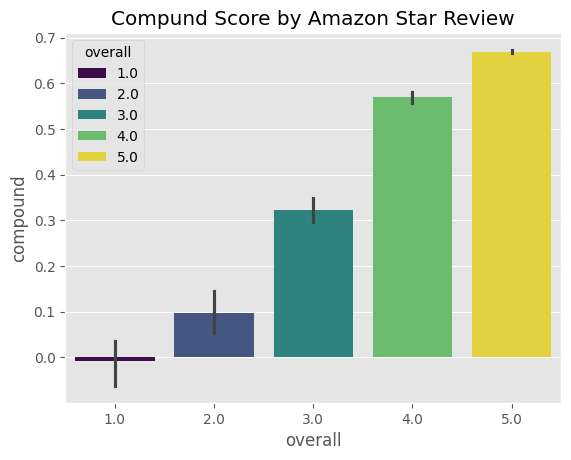

In [ ]:
ax = sns.barplot(data=vaders, x='overall',hue='overall', y='compound',palette='viridis')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

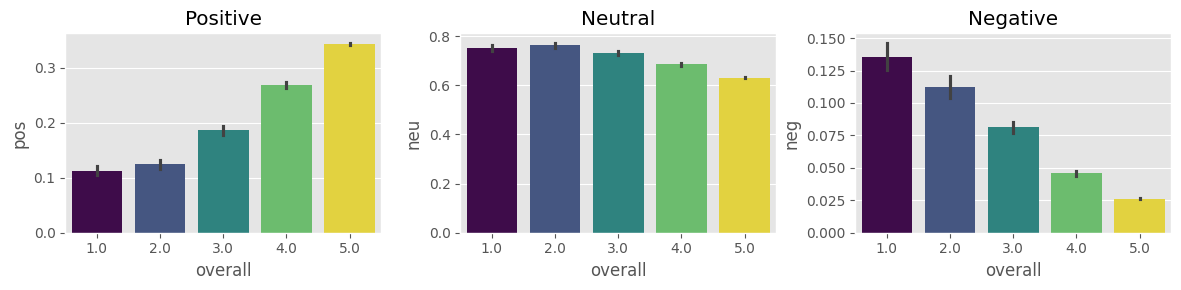

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='overall',hue='overall',y='pos', ax=axs[0],palette='viridis')
sns.barplot(data=vaders, x='overall',hue='overall', y='neu', ax=axs[1],palette='viridis')
sns.barplot(data=vaders, x='overall',hue='overall', y='neg', ax=axs[2],palette='viridis')
axs[0].set_title('Positive')
axs[0].get_legend().remove()
axs[1].set_title('Neutral')
axs[1].get_legend().remove()
axs[2].set_title('Negative')
axs[2].get_legend().remove()
plt.tight_layout()
plt.show()

# Filter out the unreasonable reviews

In [ ]:
# Define the thresholds
higher_threshold = 0.8  # Compound score above this value is considered high
lower_threshold = 0.2  # Compound score below this value is considered low
low_rating = 2  # Ratings at or below this are considered low
high_rating = 4  # Ratings at or above this are considered high

In [ ]:
# Filter out unreasonable reviews
# Case 1: Reviews with high positive sentiment but low Amazon rating
print(vaders.shape)
#print(vaders.head())

unreasonable_case1 = vaders[(vaders['compound'] > higher_threshold) & (vaders['overall'] <= low_rating)]
print(unreasonable_case1.shape)
# Case 2: Reviews with high negative sentiment but high Amazon rating
unreasonable_case2 = vaders[(vaders['compound'] < lower_threshold) & (vaders['overall'] >= high_rating)]
print(unreasonable_case2.shape)
# Combine both cases (note: this assumes you want to consider both types of "unreasonable" reviews)
unreasonable_reviews = pd.concat([unreasonable_case1, unreasonable_case2])

# Get the list of "ID" values for the unreasonable reviews
unreasonable_ids = unreasonable_reviews['Id'].values
print(unreasonable_ids)

#Ensure the unique "Id" is the DataFrame index
#if vaders.index.name != 'ID':
#    vaders.set_index('ID', inplace=True)

# To remove these unreasonable reviews from the original DataFrame by the 'ID' index
#reasonable_reviews = vaders.drop(unreasonable_reviews.index, inplace=True)

# Drop the rows from `vaders` where the "ID" matches the IDs in `unreasonable_ids`
reasonable_reviews = vaders[~vaders['Id'].isin(unreasonable_ids)]
reasonable_reviews.to_csv('reasonable_reviews.csv', index=False)
print(reasonable_reviews.shape)

(43117, 17)
(259, 17)
(3999, 17)
[   87   228   654 ... 43077 43080 43088]
(38859, 17)


In [ ]:
# Compute the average score grouped by ASIN
average_overall = reasonable_reviews.groupby('asin')['overall'].mean().reset_index()
average_compound = reasonable_reviews.groupby('asin')['compound'].mean().reset_index()
#print( average_overall)
print( average_compound)

          asin  compound
0   0061900621  0.740313
1   0062110721  0.695464
2   0142405809  0.770441
3   014242286X  0.743458
4   0147510481  0.737970
5   0147515823  0.769088
6   0307931528  0.718765
7   0312346069  0.752841
8   0312367481  0.709200
9   0374300216  0.669873
10  0374360960  0.777526
11  0375813616  0.566634
12  037582233X  0.771394
13  0375848207  0.729358
14  0375850864  0.816510
15  0375858245  0.755903
16  0375868488  0.705918
17  0385376715  0.739329
18  038538369X  0.646976
19  0385743572  0.738192
20  0399230033  0.790496
21  0439023521  0.644665
22  0439064864  0.746692
23  0439139600  0.753356
24  0439358078  0.702350
25  0439673631  0.787539
26  0439738199  0.713850
27  0439813786  0.831785
28  0545166810  0.757941
29  0545540607  0.734094
30  0761130675  0.788014
31  0761456864  0.643250
32  0763644765  0.691168
33  0764152319  0.691618
34  0803731930  0.623745
35  0811877825  0.778700
36  0887431453  0.712792
37  0961519762  0.643503
38  1416980067  0.686779


In [ ]:
#Rank by the reasonable reviews
# Assign ranks in ascending order (which aligns with the descending order of compound)
average_compound['rank'] = average_compound['compound'].rank(method='min', ascending=False)
df_rank_processed=average_compound.copy()
df_rank_processed.to_csv('rank.csv', index=False)
print(df_rank_processed)

          asin  compound  rank
0   0061900621  0.740313  23.0
1   0062110721  0.695464  38.0
2   0142405809  0.770441  13.0
3   014242286X  0.743458  21.0
4   0147510481  0.737970  26.0
5   0147515823  0.769088  14.0
6   0307931528  0.718765  32.0
7   0312346069  0.752841  18.0
8   0312367481  0.709200  35.0
9   0374300216  0.669873  42.0
10  0374360960  0.777526   9.0
11  0375813616  0.566634  50.0
12  037582233X  0.771394  12.0
13  0375848207  0.729358  28.0
14  0375850864  0.816510   2.0
15  0375858245  0.755903  16.0
16  0375868488  0.705918  36.0
17  0385376715  0.739329  24.0
18  038538369X  0.646976  44.0
19  0385743572  0.738192  25.0
20  0399230033  0.790496   4.0
21  0439023521  0.644665  45.0
22  0439064864  0.746692  20.0
23  0439139600  0.753356  17.0
24  0439358078  0.702350  37.0
25  0439673631  0.787539   6.0
26  0439738199  0.713850  33.0
27  0439813786  0.831785   1.0
28  0545166810  0.757941  15.0
29  0545540607  0.734094  27.0
30  0761130675  0.788014   5.0
31  0761

In [ ]:
# Read in data with original rank
df_rank = pd.read_excel("Book_rank_title.xlsx")
print(df_rank.shape)
print(df_rank.head())
print(df_rank["asin"])

(128, 6)
         asin  reviews_count  \
0  0385376715            644   
1  038538369X            429   
2  0375813616            377   
3  0374300216            485   
4  0887431453            312   

                                               title  \
0                   The Wonderful Things You Will Be   
1    P is for Potty! (Sesame Street) (Lift-the-Flap)   
2  Junie B. Jones's First Boxed Set Ever! (Books ...   
3                       If Animals Kissed Good Night   
4  School Zone - Big Preschool Workbook - Ages 4 ...   

                                            category  whole book rank  \
0  Books, Children's Books, Growing Up ; Facts of...               20   
1  Books, Children's Books, Growing Up ; Facts of...               49   
2  Books, Children's Books, Growing Up ; Facts of...               71   
3  Books, Children's Books, Growing Up ; Facts of...               80   
4  Books, Children's Books, Growing Up & Facts of...               94   

   rank_origin  
0    

# Combine and compare the original rank and reasonable review rank

In [ ]:
#If the 'asin' column's data type isn't object (which typically indicates a string in pandas), consider converting it:
df_rank['asin'] = df_rank['asin'].astype(str)
#Combine the original rank and reasonable review rank, and compare them
combined_rank_df = pd.merge(df_rank_processed, df_rank, on='asin', how='inner')
compare_rank_df = combined_rank_df[['asin', 'rank', 'rank_origin','title']]
sorted_compare_rank_df = compare_rank_df.sort_values(by='rank', ascending=True)
sorted_compare_rank_df.to_csv('sortedRankAfterProcessed.csv', index=False)
#print(compare_rank_df)
print(sorted_compare_rank_df)
print(sorted_compare_rank_df.shape)

          asin  rank  rank_origin  \
27  0439813786   1.0           37   
14  0375850864   2.0           48   
39  1419708457   3.0            6   
20  0399230033   4.0           21   
30  0761130675   5.0           29   
25  0439673631   6.0           47   
40  1423133080   7.0           18   
35  0811877825   8.0            8   
10  0374360960   9.0           30   
43  1452109206  10.0           36   
42  1442429771  11.0           35   
12  037582233X  12.0           27   
2   0142405809  13.0           13   
5   0147515823  14.0           39   
28  0545166810  15.0           40   
15  0375858245  16.0           45   
23  0439139600  17.0           17   
7   0312346069  18.0           49   
46  1554537045  19.0           19   
22  0439064864  20.0           25   
3   014242286X  21.0           46   
49  1938298071  22.0           15   
0   0061900621  23.0           34   
17  0385376715  24.0            1   
19  0385743572  25.0           43   
4   0147510481  26.0           31   
2

# recommand reviews and rank for specific asin

In [ ]:
# Copy the reasonable_reviews df to recommand reviews
df=reasonable_reviews.copy()
print(df.shape)


(38859, 17)


#Extract 10 reviews based on the targeted different range of compound score

In [ ]:
# List of target compound values
target_compounds = [0.1, 0.3, 0.5, 0.7, 0.9]

results = []  # To store the results

for asin in df['asin'].unique():
    for target_compound in target_compounds:
        # Filter DataFrame for current ASIN and explicitly create a copy
        temp_df = df[df['asin'] == asin].copy()

        # Calculate absolute difference from target compound value
        temp_df['difference'] = (temp_df['compound'] - target_compound).abs()

        # Sort by difference and select top two
        nearest_reviews = temp_df.sort_values(by='difference').head(2)

        # Add target_compound and ASIN for clarity in the final DataFrame
        nearest_reviews['target_compound'] = target_compound
        nearest_reviews['asin'] = asin  # Reassigning ASIN in case it's lost during filtering

        # Append to results
        results.append(nearest_reviews)

# Concatenate all results into a single DataFrame
final_df = pd.concat(results, ignore_index=True)

# Optionally, drop the 'difference' column if it's no longer needed
final_df = final_df.drop(columns=['difference'])
combined_details = pd.merge(final_df, sorted_compare_rank_df[['asin', 'rank','title']], on='asin', how='left')

#final_df.to_csv('recommendedReviews10forOneAsin.csv', index=False)
combined_details.to_csv('10ReviewsRankforAsins.csv', index=False)
print(combined_details)
#print(final_df)

        Id    neg    neu    pos  compound  overall  verified   reviewTime  \
0      399  0.000  1.000  0.000    0.0000      1.0     False  04 30, 2006   
1      245  0.000  0.954  0.046    0.2023      5.0     False  11 30, 2014   
2       43  0.000  0.923  0.077    0.3291      5.0      True  12 17, 2016   
3      223  0.000  0.938  0.062    0.3400      5.0      True   02 3, 2015   
4      387  0.019  0.932  0.049    0.4945      5.0     False   05 5, 2008   
..     ...    ...    ...    ...       ...      ...       ...          ...   
495  42730  0.000  0.239  0.761    0.4926      5.0      True  07 23, 2016   
496  42629  0.000  0.341  0.659    0.7003      5.0      True   10 9, 2017   
497  42826  0.032  0.830  0.137    0.7005      5.0      True  07 17, 2015   
498  42790  0.000  0.593  0.407    0.8999      5.0      True  01 10, 2016   
499  42773  0.000  0.501  0.499    0.8989      5.0      True  02 22, 2016   

         reviewerID        asin                      style  \
0    A2K44AH9

In [ ]:
# Specify the ASIN you're interested in
specific_asin = '0061900621'
# Use query to filter reviews for the specific ASIN
specific_asin_details = final_df.query("asin == @specific_asin")[["asin",'reviewText',"overall","compound"]]
#print(specific_asin_details)
combined_asin_details = pd.merge(specific_asin_details,  sorted_compare_rank_df[['asin', 'rank','title']], on='asin', how='left')

print(combined_asin_details)

         asin                                         reviewText  overall  \
0  0061900621  Simply doesn't apply to our family, we don't f...      1.0   
1  0061900621  Bringing home a new baby needs to be handled w...      5.0   
2  0061900621  My daughter loves this book, and I got it used...      5.0   
3  0061900621  My daughter is a big sister and she is giving ...      5.0   
4  0061900621  This book among a couple of others really help...      5.0   
5  0061900621  This book is adorable. My toddler wanted me to...      5.0   
6  0061900621                                          good gift      4.0   
7  0061900621  We are due with our second and our two year ol...      5.0   
8  0061900621  Our daughter loves this book!  It helps show t...      5.0   
9  0061900621  Cute little books! I bought this and the "I'm ...      5.0   

   compound  rank             title  
0    0.0000  23.0  I'm a Big Sister  
1    0.2023  23.0  I'm a Big Sister  
2    0.3291  23.0  I'm a Big Sister  


In [ ]:
# Specify the ASIN you're interested in
specific_asin = '1938298071'
# Use query to filter reviews for the specific ASIN
specific_asin_details = final_df.query("asin == @specific_asin")[["asin",'reviewText',"overall","compound"]]
#print(specific_asin_details)
combined_asin_details = pd.merge(specific_asin_details,  sorted_compare_rank_df[['asin', 'rank','title']], on='asin', how='left')

print(combined_asin_details)

         asin                                         reviewText  overall  \
0  1938298071  Artwork is great & the lesson of the story as ...      5.0   
1  1938298071  Purchased for my grandson. Recommended by my d...      5.0   
2  1938298071           Another treasure in the pages of history      5.0   
3  1938298071                      Good, thought provoking book.      4.0   
4  1938298071  I think the story and illustrations are adorable.      5.0   
5  1938298071                                        Good title!      5.0   
6  1938298071                    Good book as a graduation gift.      5.0   
7  1938298071  It is rare that I find a book that I like so m...      5.0   
8  1938298071  My girls, 4 and 6 years old, loved this book! ...      5.0   
9  1938298071  My daughter loves this book. Great story about...      5.0   

   compound  rank                         title  
0    0.2003  22.0  What Do You Do With an Idea?  
1    0.2023  22.0  What Do You Do With an Idea?  
2 

# Extract 2 reviews around the average compound score

In [ ]:
# Assuming 'df' is your main DataFrame with the reviews and their compound scores
# Assuming 'df_rank_processed' contains ASINs with specific target compound scores

results = []  # To store the results

for asin in df['asin'].unique():
    # Assuming each ASIN has a unique compound value in df_rank_processed
    # If multiple, this takes the first one; adjust according to your data
    target_compound = df_rank_processed.query("asin == @asin")['compound'].iloc[0]

    temp_df = df[df['asin'] == asin].copy()

    # Calculate absolute difference from target compound value
    temp_df['difference'] = (temp_df['compound'] - target_compound).abs()

    # Sort by difference and select top two
    nearest_reviews = temp_df.sort_values(by='difference').head(2)

    # Add target_compound and ASIN for clarity in the final DataFrame
    nearest_reviews['target_compound'] = target_compound
    nearest_reviews['asin'] = asin  # Ensuring ASIN column is correct

    # Append to results
    results.append(nearest_reviews)

# Concatenate all results into a single DataFrame
final_df = pd.concat(results, ignore_index=True)

# Optionally, drop the 'difference' column if it's no longer needed
final_df = final_df.drop(columns=['difference'])
final_df.to_csv('2ReviewsRankforAsins.csv', index=False)
print(final_df)

       Id    neg    neu    pos  compound  overall  verified   reviewTime  \
0     310  0.000  0.813  0.187    0.7351      5.0      True  02 23, 2014   
1     334  0.000  0.829  0.171    0.7343      4.0      True   09 3, 2013   
2     757  0.000  0.834  0.166    0.6988      5.0      True  07 30, 2013   
3     692  0.000  0.637  0.363    0.6908      3.0      True  08 12, 2014   
4     898  0.000  0.831  0.169    0.7717      5.0      True   10 2, 2016   
..    ...    ...    ...    ...       ...      ...       ...          ...   
95  41586  0.000  0.667  0.333    0.7184      5.0      True  05 12, 2015   
96  42183  0.103  0.645  0.252    0.7256      5.0      True   09 3, 2015   
97  42478  0.000  0.821  0.179    0.7263      5.0      True  03 11, 2014   
98  42892  0.000  0.613  0.387    0.7430      4.0      True  07 21, 2014   
99  42638  0.000  0.780  0.220    0.7351      5.0      True  08 24, 2017   

        reviewerID        asin                      style  \
0   A1VS280PPP7NJU  006190

In [ ]:
# Specify the ASIN you're interested in
specific_asin = '0061900621'
# Use query to filter reviews for the specific ASIN
specific_asin_details = final_df.query("asin == @specific_asin")[["asin",'reviewText',"overall","compound"]]
#print(specific_asin_details)
combined_asin_details = pd.merge(specific_asin_details,  sorted_compare_rank_df[['asin', 'rank','title']], on='asin', how='left')

print(combined_asin_details)

         asin                                         reviewText  overall  \
0  0061900621  I have a niece that is going to be a big siste...      5.0   
1  0061900621  We got this book for our daughter, because soo...      4.0   

   compound  rank             title  
0    0.7351  23.0  I'm a Big Sister  
1    0.7343  23.0  I'm a Big Sister  


In [ ]:
# Specify the ASIN you're interested in
specific_asin = '1938298071'
# Use query to filter reviews for the specific ASIN
specific_asin_details = final_df.query("asin == @specific_asin")[["asin",'reviewText',"overall","compound"]]
#print(specific_asin_details)
combined_asin_details = pd.merge(specific_asin_details,  sorted_compare_rank_df[['asin', 'rank','title']], on='asin', how='left')

print(combined_asin_details)

         asin                                         reviewText  overall  \
0  1938298071  I was enchanted by the illustrations and story...      4.0   
1  1938298071  I have been using this book with my research t...      5.0   

   compound  rank                         title  
0    0.7430  22.0  What Do You Do With an Idea?  
1    0.7351  22.0  What Do You Do With an Idea?  
